## Yandex Cloud

Облако Yandex Cloud содержит множество сервисов для выполнения базовых операций. Ниже мы приведём несколько "строительных блоков" в виде кусочков кода на Python, которые вы сможете использовать в своих проектах, например:

* Распознавание текста на картинке
* Рисование картинки по текстовому запросу с Yandex ART
* Работа с Yandex GPT, чтобы переделать текст:
   - сделать его более вежливым
   - получить краткое содержание текста
   - перевести его на другой язык
   - проверить работу студента
* распознать звук (речь) в текст
* синтезировать речь

Для начала получим файл с секретными ключами для доступа в облако:

In [ ]:
!wget https://storage.yandexcloud.net/junpub/.env
!wget https://github.com/yandex-datasphere/jacademy/blob/main/2024/images/slide.jpg?raw=true -O slide.jpg

--2025-06-05 01:14:53--  https://storage.yandexcloud.net/junpub/.env
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80 [application/x-www-form-urlencoded]
Saving to: '.env.1'

     0K                                                       100% 15,3M=0s

2025-06-05 01:14:55 (15,3 MB/s) - '.env.1' saved [80/80]



### Устанавливаем необходимые библиотеки

Для начала надо установить необходимые библиотеки Python, которые понадобятся нам в работе.

In [ ]:
%pip install dotenv yandex_cloud_ml_sdk yandex-speechkit==1.5.0 telebot==0.0.5 gradio

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 55.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 40.3 MB/s eta 0:00:0000:01
  Created wheel for yandex_chain: filename=yandex_chain-0.0.9-py3-none-any.whl size=9381 sha256=aa0a91128e907eaefed56d74fd8da5b79e4ae0e98d5e884ab88ff5431b8f6c2d
  Stored in directory: /tmp/xdg_cache/pip/wheels/80/a7/88/f2d8ee42bb6c5d4e1d410f716c1939862c56f1dfc9599dd0ff
Successfully built yandex_chain
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider addin

> **ВНИМАНИЕ!!!** После установки библиотек рекомендуется зайти в пункт меню **Kernel** -> **Restart Kernel**.

Теперь получаем секретные ключи для работы с облаком:

In [ ]:
from dotenv import load_dotenv
import os
load_dotenv()

folder_id  = os.environ['folder_id']
api_key = os.environ['api_key']


### Использование больших языковых моделей

Большие языковые модели позволяют вам совершать различные манипуляции с текстом. Основное, что может модель - это отвечать на ваши вопросы. Соответственно, формулируя вопросы по-разному, вы можете попросить модель придумать что-то, перевести текст, перефразировать его в более короткой или более вежливой форме, и многое другое.

Для работы с моделью создадим объект `gpt`:

In [ ]:
from yandex_cloud_ml_sdk import YCloudML
from IPython.display import Markdown, display

sdk = YCloudML(folder_id=folder_id, auth=api_key)
gpt_model = sdk.models.completions('yandexgpt',model_version='rc')


def printx(string):
    display(Markdown(string))

def gpt(x):
    return gpt_model.run(x)[0].text

printx(gpt('Привет! Придумай 10 новых слов для приветствия.'))

1. Здоровеньки буллы!
2. Как жизнь, супергеро(ин)я?
3. Рад(а) видеть тебя в добром здравии!
4. Приветствую тебя, путник!
5. Здравствуй, свет очей моих!
6. Как настроение, чемпион(ка)?
7. Здравствуй, друг(подруга)!
8. Привет, как твоё ничего?
9. Здравствуй, душа моя!
10. Здравствуй, мой дорогой(ая) человек!

Используем модель для преобразования текста в вежливую подробную форму:

In [12]:
texts = [
    "Мне было лень делать домашку",
    "Я опоздал, потому что проспал"
]

prompt = """Пожалуйста, перепиши текст ниже в тройных обратных кавычках в подробной вежливой 
форме, длиною в несколько предложений, не короче 2000 символов. Вот текст:```{}```"""

for x in texts:
    res = gpt(prompt.format(x))
    printx(f"**{x}**<br/>{res}\n<br/>")

**Мне было лень делать домашку**<br/>С глубоким прискорбием и чувством вины вынужден признать, что в силу своей человеческой слабости и отсутствия должной самодисциплины я не смог преодолеть соблазн и должным образом подойти к выполнению домашнего задания. Признаю, что это было проявлением лени с моей стороны, и понимаю, что такое поведение недопустимо, поскольку оно противоречит моим обязательствам и ответственности перед самим собой, а также перед теми, кто ожидает от меня более серьёзного и ответственного подхода к учёбе. Я осознаю, что выполнение домашнего задания является важной частью образовательного процесса, и его игнорирование может негативно сказаться на моих знаниях и навыках. Я искренне сожалею о своём поступке и обязуюсь приложить все усилия, чтобы впредь быть более ответственным и дисциплинированным в отношении выполнения домашних заданий.
<br/>

**Я опоздал, потому что проспал**<br/>Глубоко сожалею о том, что я опоздал на встречу. К моему большому сожалению, причиной моего опоздания стало то, что я проспал. Это абсолютно нехарактерно для меня, и я понимаю, что это могло вызвать неудобства и нарушить планы. Я приношу свои искренние извинения за доставленные неудобства и обещаю принять все необходимые меры, чтобы подобное больше не повторилось в будущем. Я очень ценю ваше понимание и терпение в этой ситуации и ещё раз прошу прощения за своё опоздание. Я осознаю, что пунктуальность — это важный аспект профессиональных отношений, и я приложу все усилия, чтобы в дальнейшем соблюдать сроки и приходить вовремя.
<br/>

Можем попросить модель сделать что-то более сложное, например, оценить ответ школьника на тесте:

In [16]:
texts = [
    "Млекопитающие — это типа такие животные, у которых есть шерсть и они рожают детёнышей. Ну и кормят их молоком, потому что у них есть молочные железы. Вроде всё.",
    "Млекопитающие — это класс позвоночных животных, характеризующийся наличием молочных желез, которые позволяют самкам кормить потомство. Большинство млекопитающих также обладают шерстью или волосами, теплокровностью и сложной системой дыхания. Они рождают живых детёнышей (за исключением яйцекладущих, таких как утконос и ехидна) и имеют высокоразвитую нервную систему, что обеспечивает сложное поведение и способность к обучению."
]

prompt = """
Мне нужно проверить ответ школьника на тесте по биологии на вопрос "млекопитающие". Тебе нужно оценить 
ответ ниже в тройных обратных кавычках по трем параметрам: полнота ответа (complete), 
стройность и стиль изложения (style) и соответствие теме (topic). Также выстави общую среднюю оценку за ответ (grade). Все
оценки выставляй по шкале от 1 до 5, возможно, с дробном виде.
Прочитай текст в сообщении ниже и верни ответ в формате JSON.
Верни только JSON, не нужно объяснений или другого текста.
Ответ школьника:
```{}```
"""

for x in texts:
    res = gpt(prompt.format(x)).replace('```','')
    printx(f"**{x}**<br/><pre>{res}</pre>")

**Млекопитающие — это типа такие животные, у которых есть шерсть и они рожают детёнышей. Ну и кормят их молоком, потому что у них есть молочные железы. Вроде всё.**<br/><pre>
{
  "complete": 3,
  "style": 2.5,
  "topic": 4,
  "grade": 3
}
</pre>

**Млекопитающие — это класс позвоночных животных, характеризующийся наличием молочных желез, которые позволяют самкам кормить потомство. Большинство млекопитающих также обладают шерстью или волосами, теплокровностью и сложной системой дыхания. Они рождают живых детёнышей (за исключением яйцекладущих, таких как утконос и ехидна) и имеют высокоразвитую нервную систему, что обеспечивает сложное поведение и способность к обучению.**<br/><pre>
{
  "complete": 4.0,
  "style": 5.0,
  "topic": 5.0,
  "grade": 4.7
}
</pre>

Использованный тут формат JSON позволяет легко преобразовать ответ из текста в данные Python:

In [17]:
import json
import pandas as pd

res = []
for x in texts:
    y = gpt(prompt.format(x))
    y = json.loads(y.replace('```',''))
    print(y)
    y['answer'] = x
    res.append(y)
    
df = pd.DataFrame(res)
df


{'complete': 3, 'style': 2.5, 'topic': 4, 'grade': 3}
{'complete': 4.5, 'style': 5, 'topic': 5, 'grade': 4.83}


,complete,style,topic,grade,answer
0,3.0,2.5,4,3.00,"Млекопитающие — это типа такие животные, у кот..."
1,4.5,5.0,5,4.83,Млекопитающие — это класс позвоночных животных...


### YandexART

YandexART - это сеть для рисования картинок по текстовому запросу:

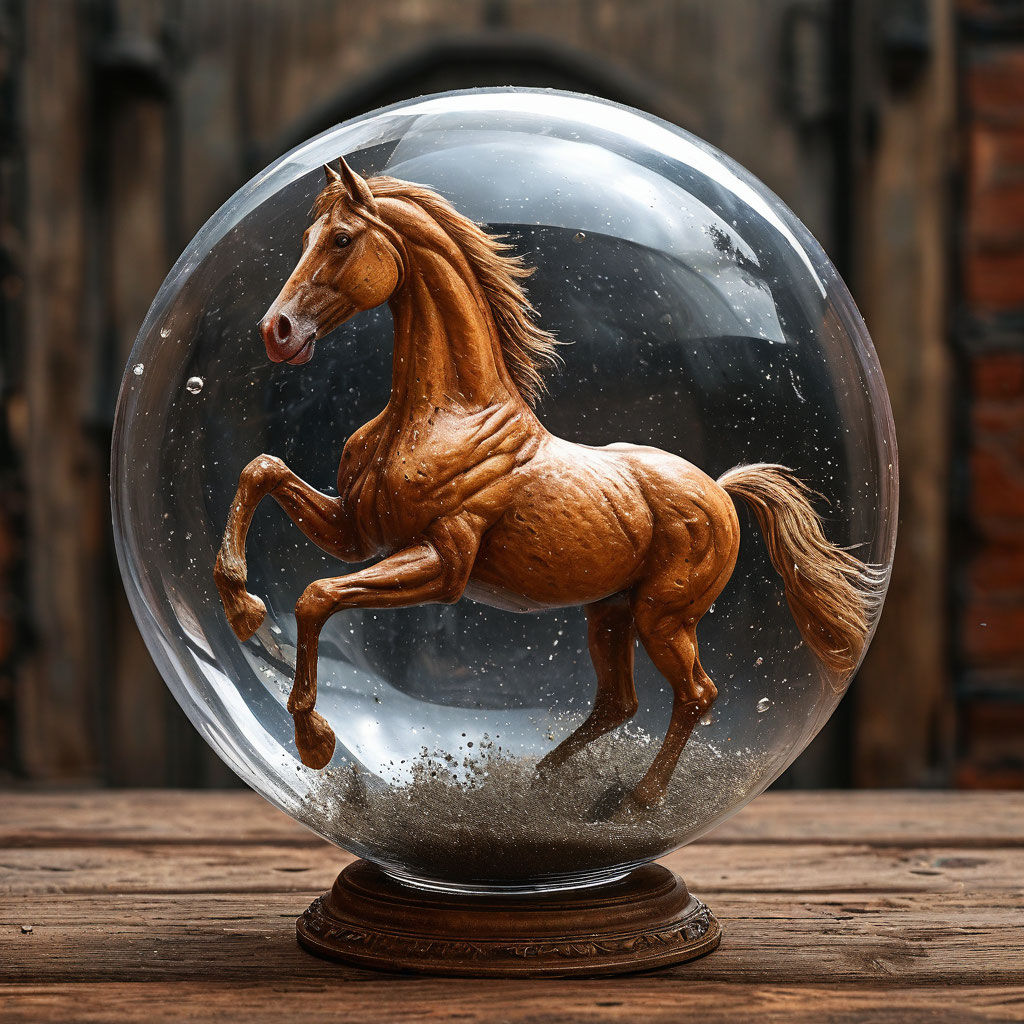

In [8]:
import io
from PIL import Image

yart_model = sdk.models.image_generation('yandex-art')

def generate(prompt):
    res = yart_model.run_deferred(prompt)
    res = res.wait()
    return Image.open(io.BytesIO(res.image_bytes))

generate("Сферический конь в вакууме")

### Другие сервисы Yandex Cloud

Для работы с другими сервисами Yandex Cloud надо использовать специальные протоколы общения - REST. Ниже пара функций, которые помогут нам в дальнейшем вызывать разные функции в облаке. Не переживайте, если вы совсем не понимаете, что тут написано.

In [12]:
import requests
import os

def call_api(url, data):
    headers = { "Authorization" : f"Api-Key {api_key}" }
    return requests.post(url, json=data, headers=headers).json()

def call_api_get(url, data):
    headers = { "Authorization" : f"Api-Key {api_key}" }
    return requests.get(url, headers=headers).json()

### Распознаём текст на картинке

Для распознавания текста на картике служит сервис Yandex Vision OCR. Рассмотрим следующую картинку:

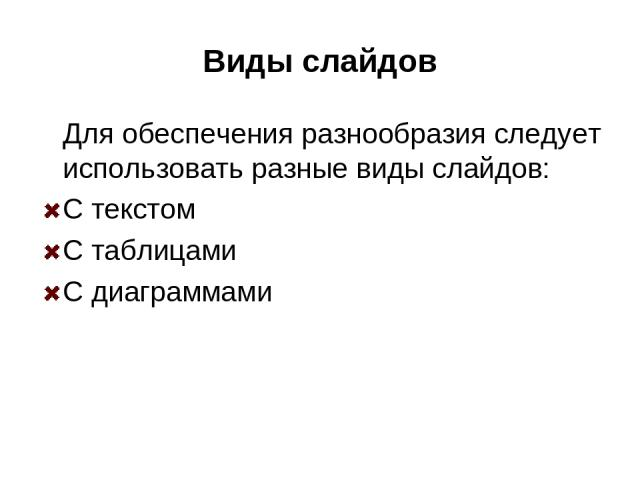

In [ ]:
from PIL import Image

img = Image.open('slide.jpg')
img

Здесь для работы с картинками мы используем специальную библиотеку Python - PIL. Объект `Image` представляет собой картинку, которую можно считывать и записывать из файла, показывать и т.д.

Функция `ocr` ниже берёт такую картинку и возвращает результат распознавания текстовых объектов на ней:

In [21]:
from io import BytesIO
import base64

def ocr(img):
    buffer = BytesIO()
    img.save(buffer,format="JPEG")
    myimage = buffer.getvalue()

    j = {
      "mimeType": "JPEG",
      "languageCodes": ["*"],
      "model": "page",
      "content": base64.b64encode(myimage).decode('utf-8')
    }
    res = call_api("https://ocr.api.cloud.yandex.net/ocr/v1/recognizeText",j)
    return res

ocr(img)

{'result': {'textAnnotation': {'width': '640',
   'height': '480',
   'blocks': [{'boundingBox': {'vertices': [{'x': '200', 'y': '53'},
       {'x': '200', 'y': '71'},
       {'x': '430', 'y': '71'},
       {'x': '430', 'y': '53'}]},
     'lines': [{'boundingBox': {'vertices': [{'x': '200', 'y': '53'},
         {'x': '200', 'y': '71'},
         {'x': '430', 'y': '71'},
         {'x': '430', 'y': '53'}]},
       'text': 'Виды слайдов',
       'words': [{'boundingBox': {'vertices': [{'x': '200', 'y': '51'},
           {'x': '200', 'y': '75'},
           {'x': '277', 'y': '75'},
           {'x': '277', 'y': '51'}]},
         'text': 'Виды',
         'entityIndex': '-1',
         'textSegments': [{'startIndex': '0', 'length': '4'}]},
        {'boundingBox': {'vertices': [{'x': '294', 'y': '51'},
           {'x': '294', 'y': '75'},
           {'x': '430', 'y': '75'},
           {'x': '430', 'y': '51'}]},
         'text': 'слайдов',
         'entityIndex': '-1',
         'textSegments': [{'s

Чтобы получить только текст, используем такой вариант:

In [22]:
def ocr_text(img):
    res = ocr(img)
    return res['result']['textAnnotation']['fullText']

txt = ocr_text(img)
print(txt)

Виды слайдов
Для обеспечения разнообразия следует
использовать разные виды слайдов:
×С текстом
×С таблицами
×С диаграммами



Теперь этот текст можно подать на вход gpt-модели, чтобы получить более красивый ответ, отформатированный в формате Markdown:

In [25]:
prompt = """Ты - научный редактор. Тебе на вход подаётся текст в тройных обратных кавычках, распознанный 
со слайдов презентации. Пожалуйста, приведи этот текст в аккуратный вид и представь его в формате Markdown.
Текст: ```{}```
"""

res = gpt(prompt.format(txt))
print(res)

## Виды слайдов

Для обеспечения разнообразия следует использовать разные виды слайдов:
* с текстом,
* с таблицами,
* с диаграммами.


### Синтез речи

Для синтеза речи будем использовать специальную библиотеку *Yandex SpeechKit*. Мы опишем функцию, которой можно передать на вход текст, а на выходе получить речь:

In [26]:
from speechkit import model_repository, configure_credentials, creds

# Аутентификация через API-ключ.
configure_credentials(
   yandex_credentials=creds.YandexCredentials(
      api_key=api_key
   )
)

def synthesize(text,voice='jane'):
   model = model_repository.synthesis_model()

   # Задайте настройки синтеза.
   model.voice = voice

   # Синтез речи и создание аудио с результатом.
   result = model.synthesize(text, raw_format=False)
   return result

res = synthesize('Привет, как ты?')
res

Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable


Можем скомбинировать синтез с gpt, и получится синтезатор анекдотов:

In [ ]:
res = gpt("Расскажи анекдот про Вовочку")
res = synthesize(res)
res

Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable


С фрагментами речи можно выполнять операцию сложения, чтобы смонтировать целую передачу из анекдотов. Также мы используем разные голоса, чтобы было интереснее слушать.

In [ ]:
topics = ['Вовочку','Русского и литовца','Математику']
anecdote_radio = None
for x in topics:
    print(f"Генерирую анекдот про {x}")
    f = synthesize(f'Анекдот про {x}',voice='julia')
    if anecdote_radio:
        anecdote_radio +=f
    else:
        anecdote_radio = f
    f = synthesize(gpt(f"Расскажи анекдот про {x}"),voice='zahar')
    anecdote_radio += f
    
anecdote_radio

Генерирую анекдот про Вовочку
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable
Генерирую анекдот про Русского и литовца
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable
Генерирую анекдот про Математику
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable
Synthesizer service is temporarily unavailable


### Распознавание речи

SpeechKit может решать обратную задачу - распознавание речи. Для этого опишем функцию `reco`, и передадим туда сгенерированную нами на прошлом шаге "передачу анекдотов".

In [29]:
from speechkit.stt import AudioProcessingType

def reco(bin):
    model = model_repository.recognition_model()
    model.model = 'general'
    model.language = 'ru-RU'
    model.audio_processing_type = AudioProcessingType.Full
    result = model.transcribe(bin)
    # можно использовать transcribe_file для распознавания файла с речью
    return ' '.join(x.normalized_text for x in result)

reco(anecdote_radio)

Recognition service is temporarily unavailable
Recognition service is temporarily unavailable


'Анекдот про Вовочку Вовочка приходит из школы домой и говорит мама. Сегодня я получил двойку по пению, мама расстроенно отвечает. Вовочка, как же так ты же в школе ни минуты не можешь прожить без песен, что случилось? Вовочка возмущенно восклицает это не я, это все. Мариванна, она сказала, что того, кто будет петь, она больше никогда не вызовет к доске анекдот про русского и русский, и литовец попали. В плен к диким племенам их привели к вождю, и тот сказал тот, кто победит меня в честном бою, получит свободу, а проигравший будет. Принесен в жертву нашим богам. Литовец сразу отказался от поединка, а русский принял вызов. Он был сильным воином и сумел победить вождя, уходя. Русский похлопал по плечу струсившего литовца и сказал ему. Что же ты, брат, не стал драться трусливее, заяц оказался на? Что литовец ответил, а что я, я тебе не дурак. Ты вон какой здоровый, еще зашибешь ненароком. Анекдот про математику Вовочка на уроке математики жалуется соседу по парте Сидоров. У меня серьезная

## Создаём телеграм-бота

Для интерфейса с пользователем удобно использовать телеграм-бота. Первым делом при создании бота нам необходимо создать бота в Telegram, используя специального системного бота **botfather**. Ему нужно дать команду **/newbot**, заполнить ряд полей, и получить в итоге специальный **токен** такого вида:

```
7292776300:AAGeoTIVI4pjNTxuCW7UckKck5G1ZNfFidw
```

Этот токен необходимо записать в переменную **tg_token** ниже.

После этого запустите ячейку ниже, описывающую простейшего бота:


In [ ]:
import telebot 

telegram_token = '<сюда поместите свой токен>'

bot = telebot.TeleBot(telegram_token)

# Обработчик команды /start
@bot.message_handler(commands=['start'])
def start(message):
    # Отправляем приветственное сообщение
    bot.send_message(message.chat.id,
                     'Привет, я бот, как дела?')

# Обработчик для сообщений, содержащих слово "анекдот"
@bot.message_handler(func=lambda message: 'анекдот' in message.text.lower())
def handle_anecdote(message):
    bot.send_message(message.chat.id, f"Вы хотите анекдот? А я их все забыл...")
    
# Обработчик для всех входящих сообщений
@bot.message_handler(func=lambda message: True)
def handle_message(message):
    bot.send_message(message.chat.id, f"Привет, вы сказали {message.text}.")
    
# Запуск бота
bot.polling(none_stop=True)

Ячейка выше будет выполняться бесконечно, пока вы явно её не остановите клавишей "стоп" (квадратик наверху). Пока ячейка работает - ваш бот в Telegram будет окликаться на сообщения. Когда вы останавливате ячейку, или DataSphere выклбчается - бот перестаёт работать. Чтобы он работал всегда - надо использовать более хитрые возможности Yandex Cloud, с которыми мы не будем знакомиться.

Ниже содержится код бота, который умеет принимать и посылать картинки и аудиосообщения. Используйте его в качестве отправной точки для построения своего проекта.

In [ ]:
import io
from PIL import Image

bot = telebot.TeleBot(telegram_token)

# Обработчик команды /start
@bot.message_handler(commands=['start'])
def start(message):
    # Отправляем приветственное сообщение
    bot.send_message(message.chat.id,
                     'Привет, я бот, как дела?')

# Обработчик для сообщений, содержащих слово "анекдот"
# В ответ на это бот посылает звуковой файл с анекдотами, который нами был сгенерирован ранее
@bot.message_handler(func=lambda message: 'анекдот' in message.text.lower())
def handle_anecdote(message):
    audio_buffer = io.BytesIO()
    anecdote_radio.export(audio_buffer, format="ogg", codec="libopus")
    audio_buffer.seek(0)
    # Используйте одну из команд ниже для посылки голосового сообщения или аудио-файла
    #bot.send_audio(message.chat.id, audio_buffer)
    bot.send_voice(message.chat.id, audio_buffer)

# Обработчик для сообщений, содержащих слово "нарисуй"
# В ответ на это бот посылает сгенерированную картинку
@bot.message_handler(func=lambda message: 'нарисуй' in message.text.lower())
def handle_anecdote(message):
    img = generate(message.text)
    bot.send_photo(message.chat.id, img)

    
# Обработчик голосовых сообщений
@bot.message_handler(content_types=['voice'])
def handle_voice_message(message):
    # Получаем инфомацию о файле
    voice_file_info = bot.get_file(message.voice.file_id)
    # Скачиваем файл
    downloaded_file = bot.download_file(voice_file_info.file_path)
    res = reco(downloaded_file)
    bot.reply_to(message, f"Получено голосовое сообщение: {res}")

# Обработчик картинок
@bot.message_handler(content_types=['photo'])
def handle_image_message(message):
    highest_res_photo = message.photo[-1]  # Берём вариант фото с макс разрешением
    file_info = bot.get_file(highest_res_photo.file_id)
    # скачиваем файл
    downloaded_file = bot.download_file(file_info.file_path)
    img = Image.open(io.BytesIO(downloaded_file))
    res = ocr_text(img)
    bot.reply_to(message, f"Текст на картинке: {res}")
    
# Обработчик для всех входящих сообщений
@bot.message_handler(func=lambda message: True)
def handle_message(message):
    bot.send_message(message.chat.id, f"Привет, вы сказали {message.text}.")
    
# Запуск бота
print("Бот готов к работе")
bot.polling(none_stop=True)

Бот готов к работе
Recognition service is temporarily unavailable
Recognition service is temporarily unavailable
Recognition service is temporarily unavailable
Recognition service is temporarily unavailable


## Создаём веб-приложение

Другой способ построения интерфейса приложения - это веб-приложение, к которому можно обратиться через интернет с помощью браузера. Для простых интерфейсов можно использоваться простую библиотеку [Gradio](https://www.gradio.app/). Напишем приложение, которое будет рисовать картинку по запросу.

Приложение устроено следующим образом:
* Мы описываем, как устроен интерфейс приложения, внутри команды `with gr.Blocks() as app`.
* Интерфейс можем содержать разные элементы: текст (`gr.Markdown`), строки для ввода текста (`gr.Textbox`), элементы для ввода или вывода изображений (`gr.Image`) и другие.
* Для разметки интерфейса используется **сетка**, состоящая из строк и столбцов.
   - Команда `with gr.Row():` означает начало строки. Все дальнейшие элементы будут располагаться в одной строке горизонтально
   - Команда `with gr.Column():` означает начало столбца, и все элементы внутри будут вертикальны
   - По умолчанию все элементы внутри `gr.Blocks()` располагаются вертикально
* Для запуска приложения используем кнопку `gr.Button()`, при этом задаём **обработчик события** на нажатие кнопки командой `btn.click`. Мы указываем, какую функцию надо вызвать (`fn=...`), какие аргументы передать ей на вход (`inputs=...`, в нашем случае это поле ввода `inp`), и куда надо записать результат функции (`outputs=...`, в нашем случае - это поле с картинкой `outp`).

Когда приложение запускается, с ним можно работать прямо из DataSphere, либо из любого браузера, подключенного к интернету. При запуске приложение выдает примерно такую строчку:
```
Running on public URL: https://b245e0aa5f432b4f65.gradio.live
```
По этому адресу любой желающий может подключиться к приложению - но только пока у нас работает ячейка в DataSphere.


In [ ]:
import gradio as gr

def run(prompt,style):
    return generate(prompt+' в стиле '+style)

with gr.Blocks() as app:
    gr.Markdown('## Рисовалка')
    gr.Markdown('Это приложение нарисует вам картинку')
    with gr.Row(): # Начинаем строчку интерфейса
        with gr.Column():
            inp = gr.Textbox(placeholder='Напиши, что нарисовать', label='Промпт')
            style = gr.Dropdown(['Ван гог','Куинджи','Стимпанк'])
        outp = gr.Image(label='Результат')
    btn = gr.Button("Нарисовать")
    btn.click(fn=run,inputs=[inp,style],outputs=outp)
    
app.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://205c0e1f00c221c681.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
